<a href="https://colab.research.google.com/github/Saptiva-sudo/oasis_infobye_internship_tasks/blob/main/TASK3_OASIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING AND DISPLAYING THE DATASET**

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!kaggle datasets download -d vijayaadithyanvg/car-price-predictionused-cars

import zipfile
zip_ref = zipfile.ZipFile('/content/car-price-predictionused-cars.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('/content/car data.csv')
df.head()

Dataset URL: https://www.kaggle.com/datasets/vijayaadithyanvg/car-price-predictionused-cars
License(s): CC0-1.0
  0% 0.00/3.76k [00:00<?, ?B/s]
100% 3.76k/3.76k [00:00<00:00, 6.75MB/s]


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

**OVERALL SUMMARY OF THE DATASET**

In [ ]:
df.describe().style.format(precision=2).background_gradient(cmap='coolwarm')


,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.00,301.00,301.00,301.00,301.00
mean,2013.63,4.66,7.63,36947.21,0.04
std,2.89,5.08,8.64,38886.88,0.25
min,2003.00,0.10,0.32,500.00,0.00
25%,2012.00,0.90,1.20,15000.00,0.00
50%,2014.00,3.60,6.40,32000.00,0.00
75%,2016.00,6.00,9.90,48767.00,0.00
max,2018.00,35.00,92.60,500000.00,3.00


**EXPLORING AND PREPROCESSING THE DATASET**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [ ]:
print("duplicates are :",df.duplicated().sum())
df = df.drop_duplicates()
print("Final count of duplicate values")
df.duplicated().sum()

duplicates are : 2
Final count of duplicate values


0

**CHECKING FOR OUTLIERS USING BOXPLOTS**

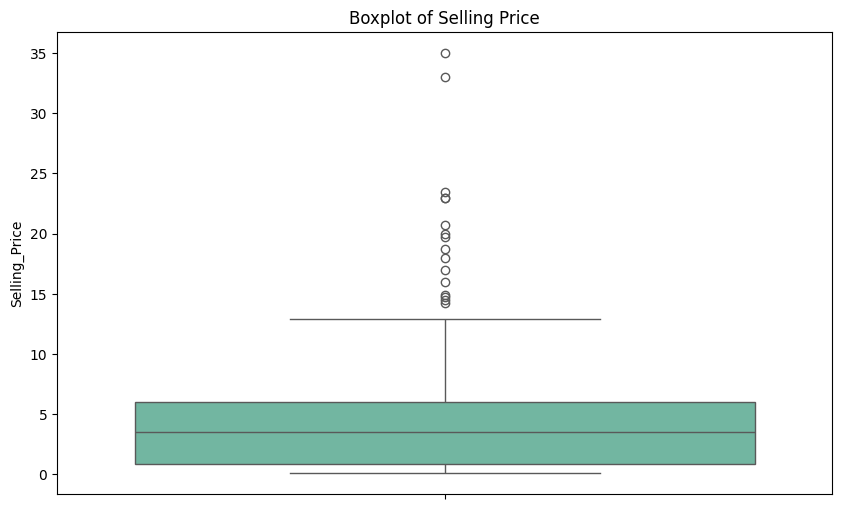

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(df['Selling_Price'],palette='Set2')
plt.title('Boxplot of Selling Price')
plt.show()

**COORELATION OF THE FEATURES WITH SELLING PRICE**

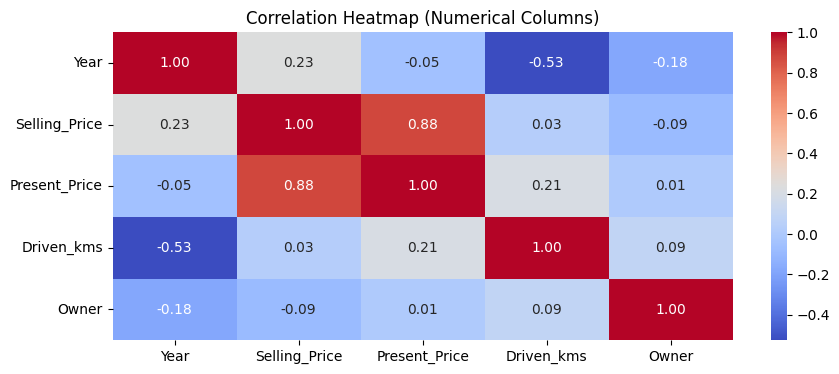

In [ ]:
numerical_columns = ['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Owner']

# Create a DataFrame containing only the numerical columns
numerical_df = df[numerical_columns]

# Calculate the correlation matrix for numerical columns
correlation_matrix = numerical_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Numerical Columns)')
plt.show()

1.   Selling Price is highly positvely correlated with the Present Price i.e Higher the present market value higher is the Selling Price.
2.   Year is negatively correlated with Present Price , Driven_kms and Owner which means as  the lifespan of cars increases, their selling prices, present prices, and driven kilometers tend to decrease.
3.   Driven_kms is very weakly coorelated with Selling Price,Present Price and Owner.



**DISTRIBUTION OF THE NUMERIC FEATURES**

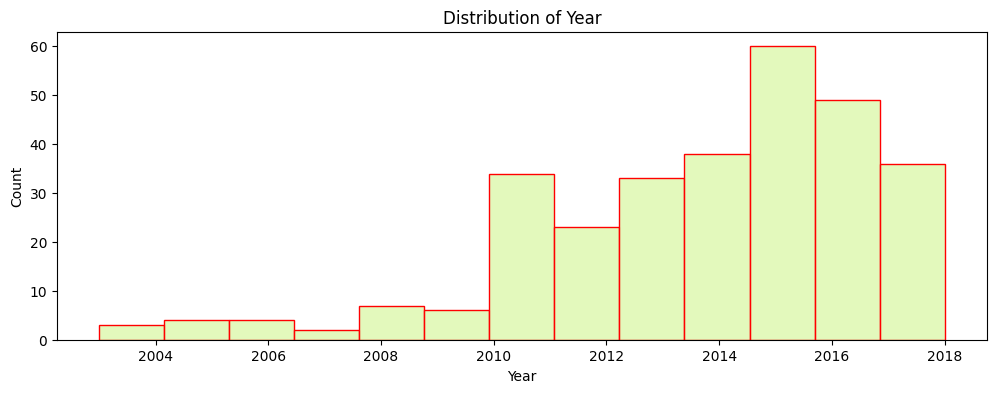

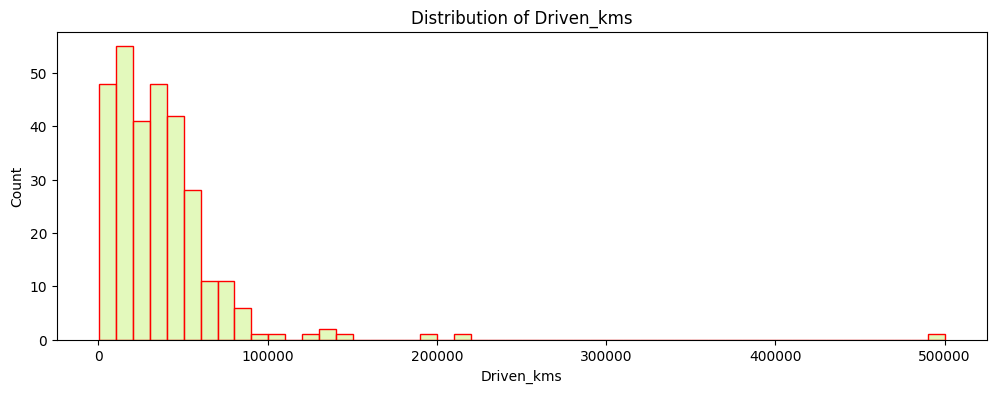

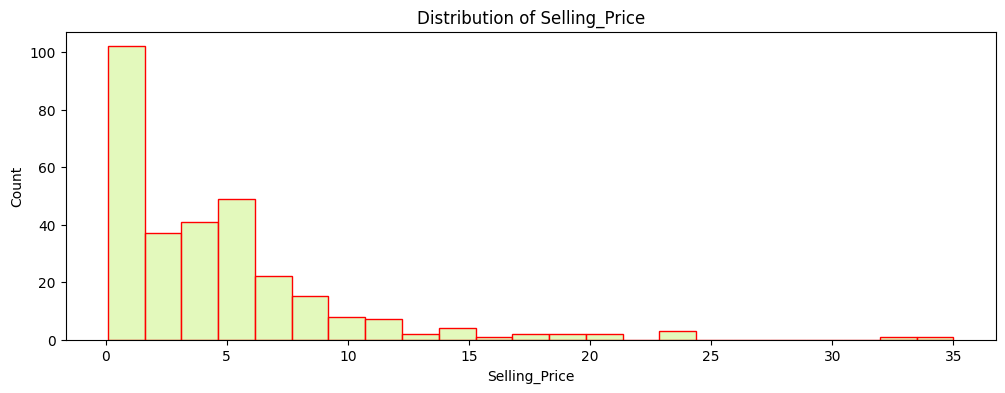

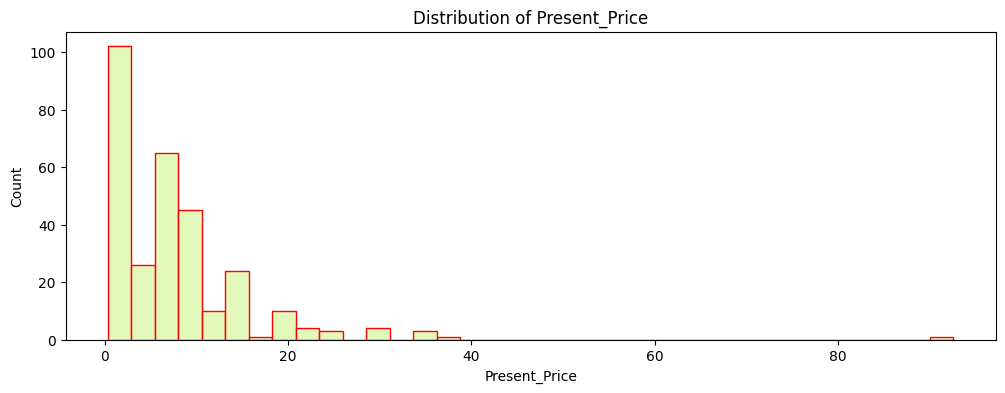

In [ ]:
numerical_features = ['Year', 'Driven_kms', 'Selling_Price', 'Present_Price']
for i in numerical_features:
    plt.figure(figsize=(12, 4))
    sns.histplot(data=df, x=i,color='#DAF7A6', edgecolor='red')
    plt.title(f'Distribution of {i}')
    plt.show()

1.   2014,2015 and 2016 has seen the maximum counts of car being sold.
2.   Driven_kms less than 10,00,000 is the ideal for selling.
3.   Higher the present price , higher is the Selling Price.



**DISTRIBUTION OF CATEGORICAL FEATURES**

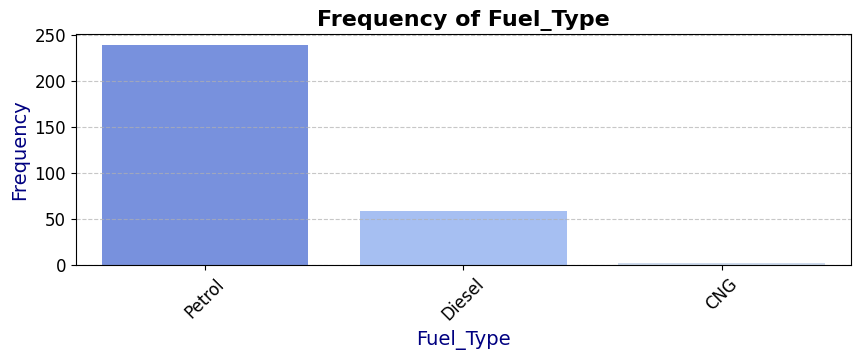

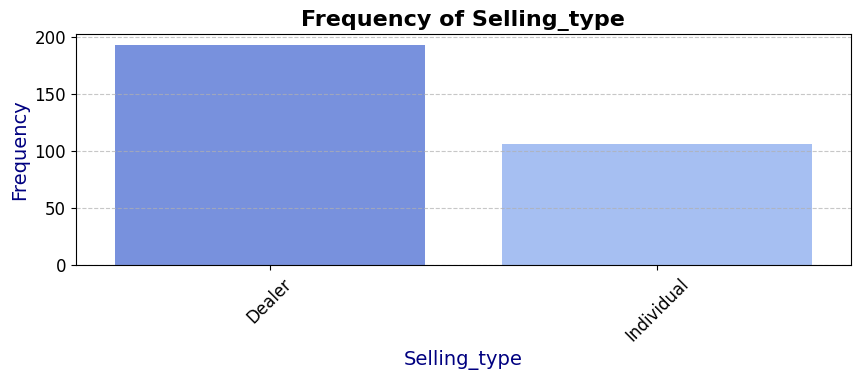

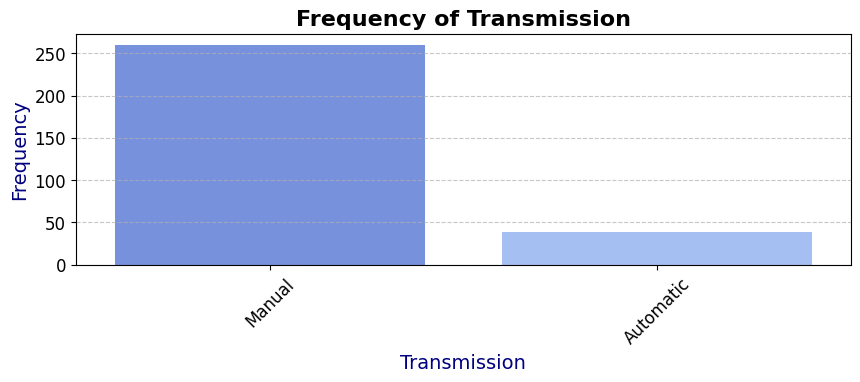

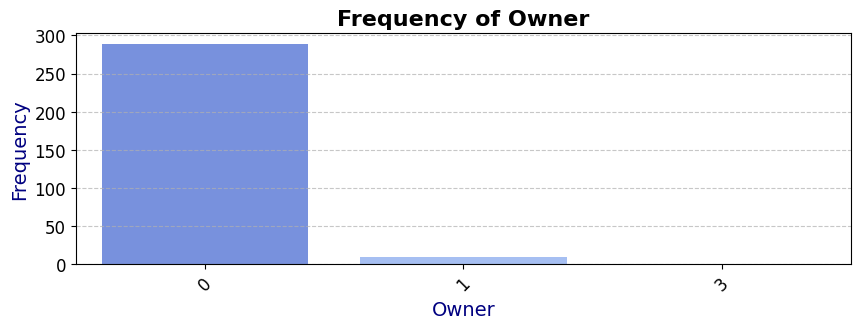

In [ ]:
# Define a color palette for the plots
colors = sns.color_palette("coolwarm")
categorical_features = ['Fuel_Type', 'Selling_type', 'Transmission', 'Owner']
# Plot each categorical feature
for feature in categorical_features:
    plt.figure(figsize=(10, 3))
    sns.countplot(x=feature, data=df, palette=colors)
    plt.title(f'Frequency of {feature}', fontsize=16, fontweight='bold')
    plt.xlabel(f'{feature}', fontsize=14, color='navy')
    plt.ylabel('Frequency', fontsize=14, color='navy')
    plt.xticks(fontsize=12, rotation=45)
    plt.yticks(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

1.  Fuel Type: The plot shows that cars with petrol engines have a higher frequency compared to diesel. Thus, it can be concluded that petrol-powered cars are more common.
2.  Selling Type: The plot indicates that cars sold by dealers have a higher frequency than those sold by individuals. From this, we can infer that a significant portion of the cars in the dataset are sold by dealers rather than individuals.
3. Transmission: The countplot reveals that cars with manual transmission have a higher frequency than those with automatic transmission. This suggests that manual transmission cars are more prevalent in the dataset compared to automatic transmission cars.
4.  Owner: The graph displays that cars with 0 previous owners have a higher frequency than those with 1 previous owner. This implies that cars with no previous owners are more common in the dataset compared to those with a single previous owner.

**TOP 20 CAR MODELS IN TERMS OF FREQUENCY**

In [ ]:
import altair as alt
palette_name = 'set1'

n = 15  # Number of top car models to plot
top_car_models = df['Car_Name'].value_counts().head(n).reset_index()
top_car_models.columns = ['Car_Name', 'Frequency']

bars = alt.Chart(top_car_models).mark_bar(opacity=0.7).encode(
    x=alt.X('Frequency:Q', title='Frequency'),
    y=alt.Y('Car_Name:N', title='Car Models', sort='-x'),
    color=alt.Color('Frequency:Q', scale=alt.Scale(scheme=palette_name), legend=None),
    tooltip=['Frequency:Q', 'Car_Name:N']
).properties(
    title=f'Top {n} Car Models by Frequency',
    width=600,
    height=400
)

bars.configure(background='white').interactive().configure_axis(labelFontSize=14)



alt.Chart(...)

Top 5 cars in terms of frequently sold are:
1. City
2. Corolla altis
3. Verna
4. Bio
5. Fortuner

**TOP 20 CAR MODELS IN TERMS OF SELLING PRICE**

In [ ]:
# Calculate average price for each car model
sp = df.groupby('Car_Name')['Selling_Price'].mean().sort_values(ascending=False)
n = 15
palette_name = 'Set2'
top_car_models = sp.head(n).reset_index()

bars = alt.Chart(top_car_models).mark_bar(opacity=0.8).encode(
    x=alt.X('Selling_Price:Q', title='Selling Price'),
    y=alt.Y('Car_Name:N', title='Car Models', sort='-x'),
    color=alt.Color('Car_Name:N', scale=alt.Scale(scheme=palette_name),legend=None),
    tooltip=['Selling_Price:Q', 'Car_Name:N']
).properties(
    title=f'Top {n} Car Models by Selling Price',
    width=600,
    height=400
)

bars.configure(background='white').interactive().configure_axis(labelFontSize=14)


alt.Chart(...)

Top 5 cars in terms of higher selling price are:
1. Land cruiser
2. Fortuner
3. Innova
4. Creta
5. Elantra

**DATA CLEANING AND TRANSFORMATION**

In [ ]:
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
# encoding "Seller_Type" Column
df.replace({'Selling_type':{'Dealer':0,'Individual':1}},inplace=True)
# encoding "Transmission" Column
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [ ]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[numerical_features]=scaler.fit_transform(df[numerical_features])

**MODEL BUILDING AND PREDICTION**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
X=df.drop(columns=['Car_Name','Selling_Price'],axis=1)
Y=df["Selling_Price"]
x_train, x_test, y_train, y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
gb_regressor.fit(x_train,y_train)
pred1=gb_regressor.predict(x_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test,pred1)
print("Mean Absolute Error (MAE):", mae)
print("==============================================================================")
mse = mean_squared_error(y_test,pred1)
print("Mean Squared Error (MSE):", mse)
print("==============================================================================")
r2 = r2_score(y_test,pred1)
print("R-squared (R2) Score:", r2)
print("==============================================================================")
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test,pred1)
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Absolute Error (MAE): 0.21558119084821087
Mean Squared Error (MSE): 0.21097890560259802
R-squared (R2) Score: 0.7973192256525158
Mean Absolute Percentage Error (MAPE): 117.8352430136399


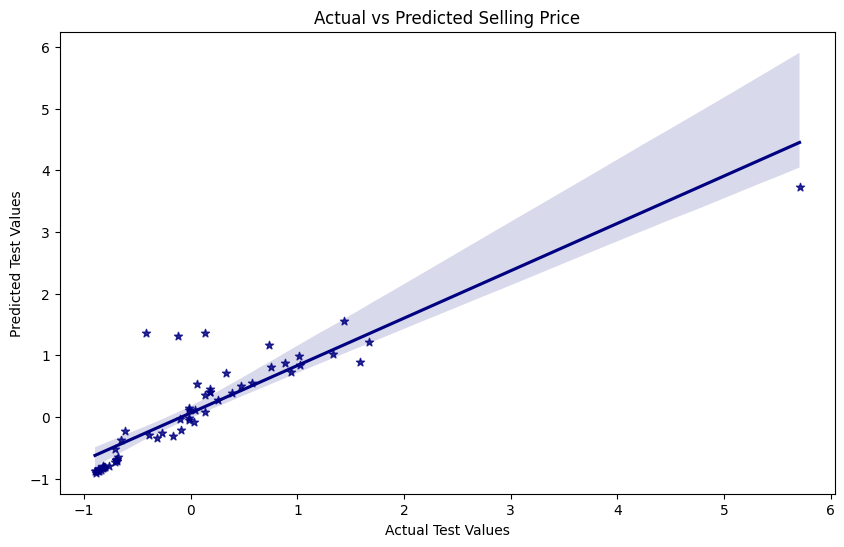

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=pred1, color="navy",marker="*",label="best_fit_line")
plt.title('Actual vs Predicted Selling Price')
plt.xlabel('Actual Test Values')
plt.ylabel('Predicted Test Values')
plt.show()

**BUILDING RANDOM FOREST CLASSIFIER MODEL AND OBSERVING ITS PERFORMANCE**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(x_train,y_train)
pred2=rf_regressor.predict(x_test)

In [ ]:
mae = mean_absolute_error(y_test,pred2)
print("Mean Absolute Error (MAE):", mae)
print("==============================================================================")
mse = mean_squared_error(y_test,pred2)
print("Mean Squared Error (MSE):", mse)
print("==============================================================================")
r2 = r2_score(y_test,pred2)
print("R-squared (R2) Score:", r2)
print("==============================================================================")
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test,pred2)
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Absolute Error (MAE): 0.2916719844850351
Mean Squared Error (MSE): 0.47784063656266745
R-squared (R2) Score: 0.5409535851150817
Mean Absolute Percentage Error (MAPE): 156.5478082054697


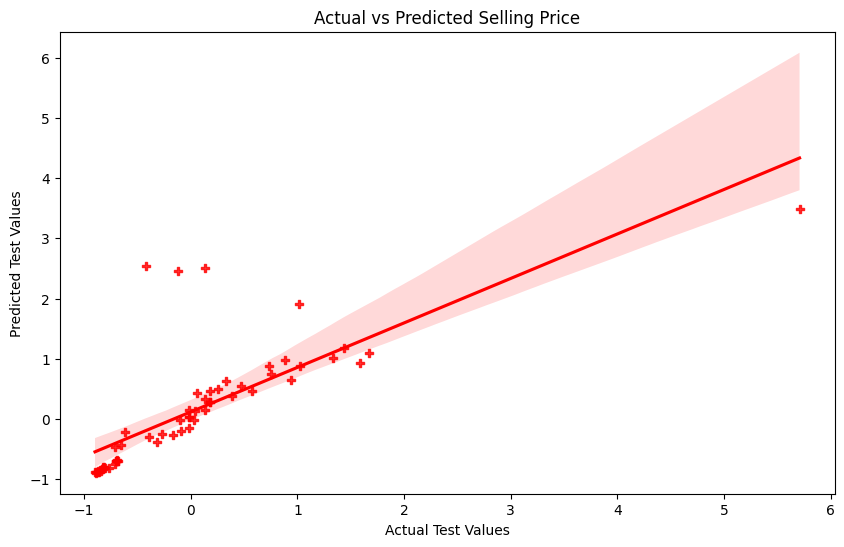

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=pred2, color="red",marker="P",label="best_fit_line")
plt.title('Actual vs Predicted Selling Price')
plt.xlabel('Actual Test Values')
plt.ylabel('Predicted Test Values')
plt.show()

**BUILDING THE DECISION TREE REGRESSOR MODEL AND EVALUATING THE PERFORMANCE**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor(random_state=42,max_depth=5)
dt_regressor.fit(x_train, y_train)
pred3 = dt_regressor.predict(x_test)

In [ ]:
mae = mean_absolute_error(y_test,pred3)
print("Mean Absolute Error (MAE):", mae)
print("==============================================================================")
mse = mean_squared_error(y_test,pred3)
print("Mean Squared Error (MSE):", mse)
print("==============================================================================")
r2 = r2_score(y_test,pred3)
print("R-squared (R2) Score:", r2)
print("==============================================================================")
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test,pred3)
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Absolute Error (MAE): 0.23251532639883118
Mean Squared Error (MSE): 0.1908861311353608
R-squared (R2) Score: 0.8166217197865969
Mean Absolute Percentage Error (MAPE): 143.85342361968938


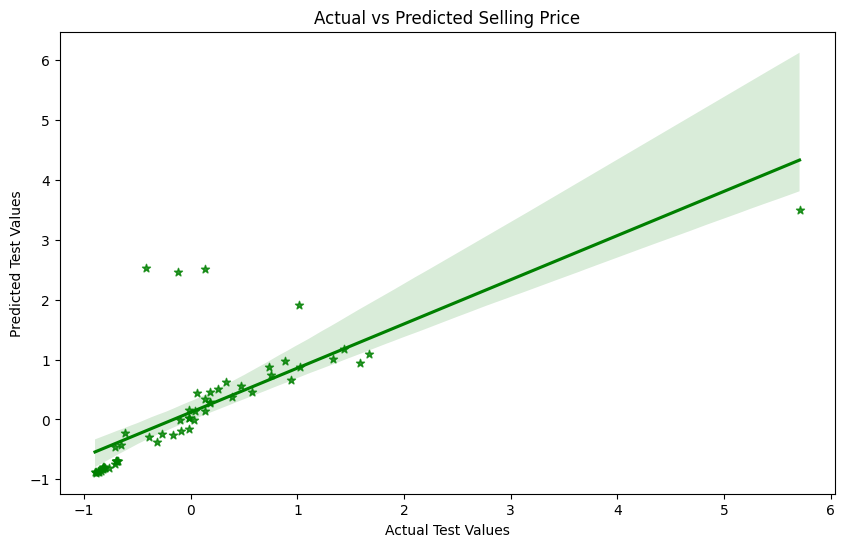

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=pred2, color="green",marker="*",label="best_fit_line")
plt.title('Actual vs Predicted Selling Price')
plt.xlabel('Actual Test Values')
plt.ylabel('Predicted Test Values')
plt.show()

**BUILDING THE LINEAR REGRESSION MODEL AND EVALUATING ITS PERFORMANCE**

In [ ]:
from sklearn.linear_model import LinearRegression

lin_regressor = LinearRegression()
lin_regressor.fit(x_train,y_train)
pred_linear = lin_regressor.predict(x_test)

# Calculate evaluation metrics
mae_linear = mean_absolute_error(y_test, pred_linear)
mse_linear = mean_squared_error(y_test, pred_linear)
r2_linear = r2_score(y_test, pred_linear)
mape_linear = mean_absolute_percentage_error(y_test, pred_linear)

# Print the evaluation metrics
print("Mean Absolute Error (MAE) for Linear Regression:", mae_linear)
print("==============================================================================")
print("Mean Squared Error (MSE) for Linear Regression:", mse_linear)
print("==============================================================================")
print("R-squared (R2) Score for Linear Regression:", r2_linear)
print("==============================================================================")
print("Mean Absolute Percentage Error (MAPE) for Linear Regression:", mape_linear)


Mean Absolute Error (MAE) for Linear Regression: 0.30965506164977985
Mean Squared Error (MSE) for Linear Regression: 0.2696107791585124
R-squared (R2) Score for Linear Regression: 0.7409934356413548
Mean Absolute Percentage Error (MAPE) for Linear Regression: 137.96211479722368


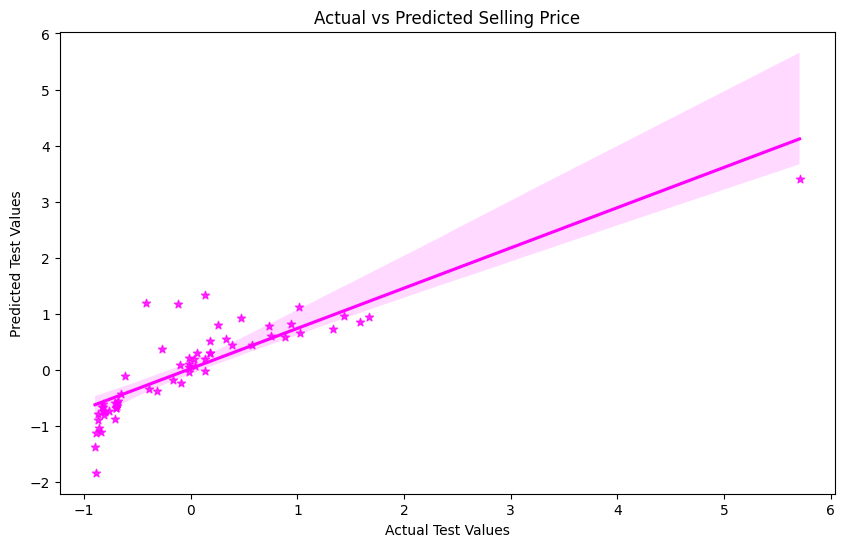

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=pred_linear, color="magenta",marker="*",label="best_fit_line")
plt.title('Actual vs Predicted Selling Price')
plt.xlabel('Actual Test Values')
plt.ylabel('Predicted Test Values')
plt.show()

**PREDICTIONS USING THE DECISION TREE REGRESSOR MODEL AS IT HAS HIGHER R SQUARED VALUE**

In [ ]:
new_data_point = [[2015,6.87,42450,1,0,0,0]]  # Example data point with the same features as your dataset
# Make prediction
prediction = dt_regressor.predict(new_data_point)

print("Predicted Selling Price:", prediction)

Predicted Selling Price: [6.1115338]


**The Decision Tree Regressor performs similarly to the Gradient Boosting Regressor, with lower errors and a higher R-squared value, indicating a better fit to the data.Overall, based on these metrics, the Decision Tree Regressor seems to be the best-performing model for this specific dataset.**